In [1]:
import time

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np

import os, sys

from provided.utils import make_img_overlay

from preprocessing import *

import pandas as pd

In [2]:
ROOT_DIR = 'training/'
IMAGE_DIR = ROOT_DIR + 'images/'
GT_DIR = ROOT_DIR + 'groundtruth/'

PATCH_SIZE = 10

WINDOW_SIZE = 71

In [3]:
files = os.listdir(IMAGE_DIR)

imgs = np.stack([load_image(IMAGE_DIR + file) for file in files]) # images (400, 400, 3)
gt_imgs = np.stack([load_image(GT_DIR + file) for file in files]) # images (400, 400)

patched_imgs = np.stack([patch_image(img, PATCH_SIZE) for img in imgs]) # images (400, 400)
patched_gts = np.stack([patch_groundtruth(gt, PATCH_SIZE) for gt in gt_imgs])

In [4]:
im = imgs[0]

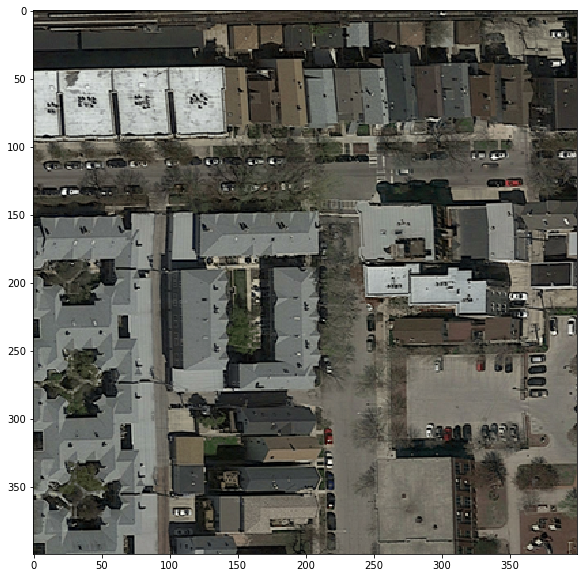

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(im)

In [6]:
padded = reflect_padding(im, 40)

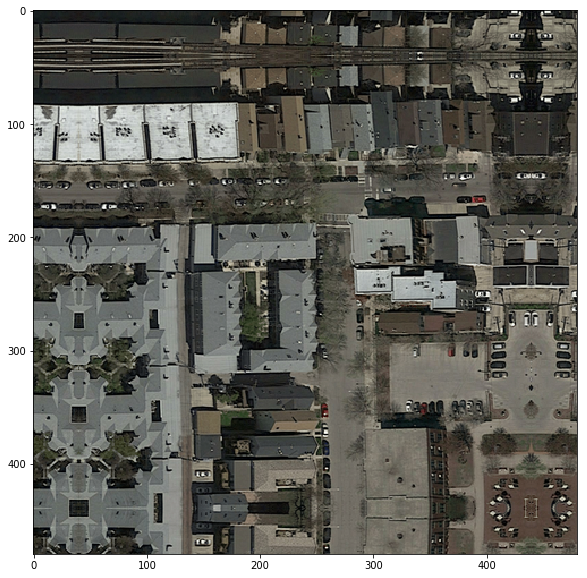

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(padded)

In [8]:
padded.shape

(480, 480, 3)

In [9]:
mask = np.ones(padded.shape[:2])

In [10]:
mask.shape

(480, 480)

In [11]:
mask[40:-40, 40:-40] = -1

In [12]:
res = make_img_overlay(padded, mask)

In [13]:
import scipy

/home/vinz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


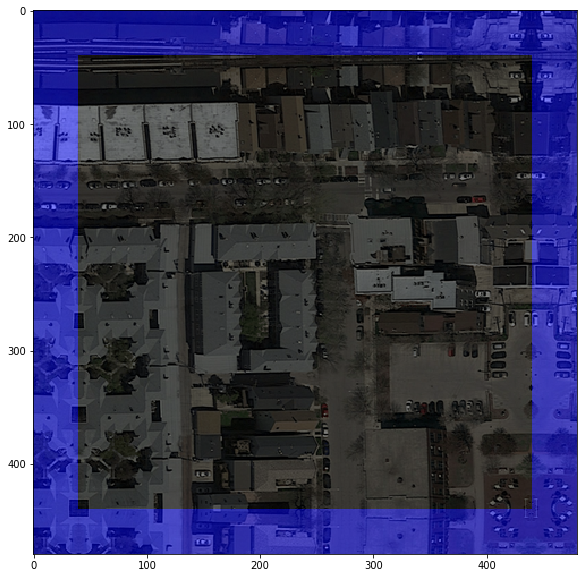

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(res)
scipy.misc.imsave('padding_example-borderwidth40.png', res)

In [15]:
from skimage.color import rgb2hsv

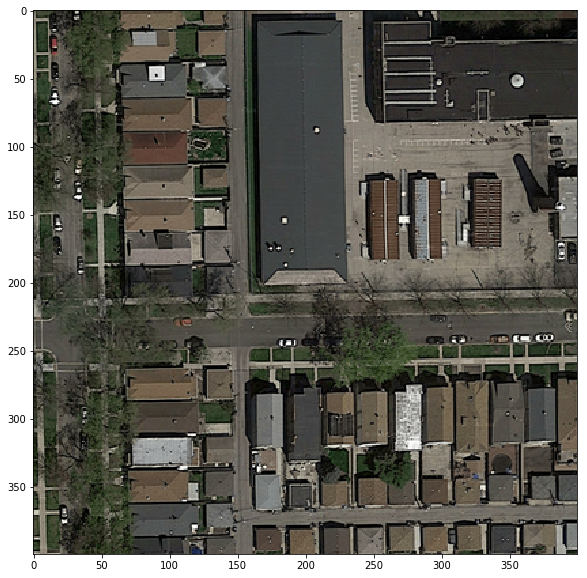

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(imgs[2])

In [17]:
patched = patch_image(imgs[2], 10)

In [18]:
scipy.misc.imsave('patching_example-10.png', patched)

/home/vinz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


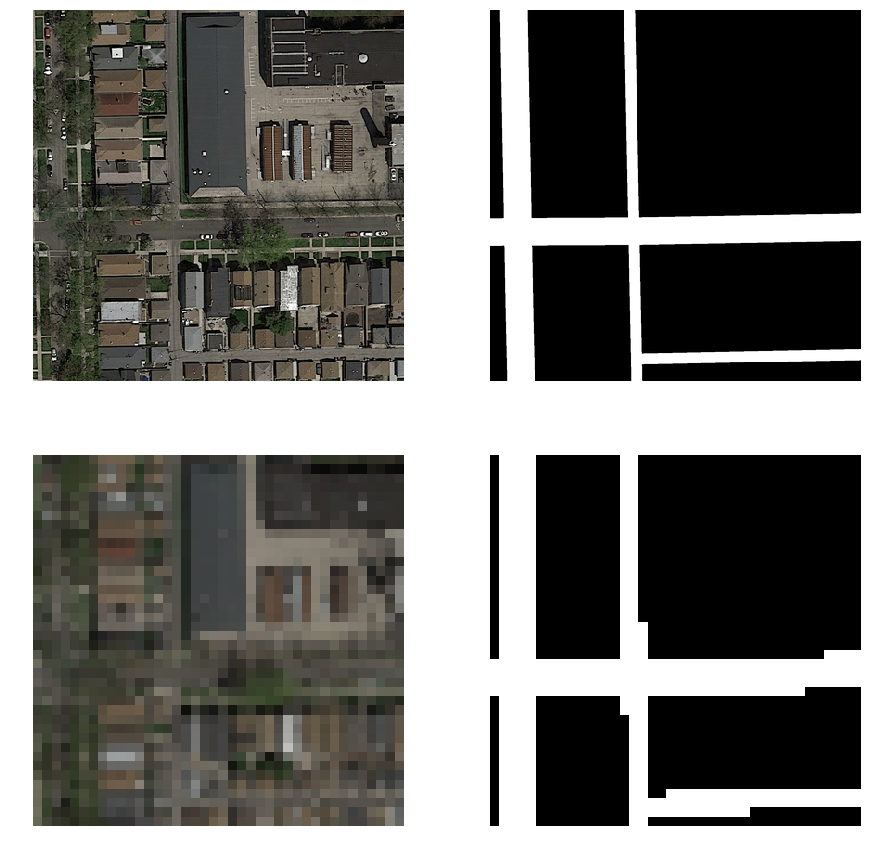

In [19]:
fig, ((im, gt), (pim, pgt)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

im.imshow(imgs[2])
gt.imshow(gt_imgs[2], cmap='Greys_r')
pim.imshow(patched_imgs[2])
pgt.imshow(patched_gts[2], cmap='Greys_r')
im.axis('off')
gt.axis('off')
pim.axis('off')
pgt.axis('off')

fig.savefig('patching.png')

In [20]:
mlp_gs = pd.read_csv('mlp_gridsearch.csv', names=['hidden_size', 'learning_rate', 'neighborhood size', 'folds'])

mlp_gs.folds = mlp_gs.folds.str.replace('[', '')
mlp_gs.folds = mlp_gs.folds.str.replace(']', '')

folds = mlp_gs.folds.str.split(',', expand=True)

for col in folds.columns:
    folds[col] = pd.to_numeric(folds[col])

mlp_gs.folds = folds.mean(axis=1)
mlp_gs.columns = ['hidden_size','learning_rate', 'neighborhood_side', 'mean_f1']

In [21]:
mlp_gs

,hidden_size,learning_rate,neighborhood_side,mean_f1
0,12,0.0001,15,0.047116
1,20,0.0001,15,0.060618
2,28,0.0001,15,0.089028
3,36,0.0001,15,0.104001
4,44,0.0001,15,0.116611
5,12,0.0001,25,0.138162
6,20,0.0001,25,0.147475
7,28,0.0001,25,0.237291
8,36,0.0001,25,0.263017
9,44,0.0001,25,0.289413


In [22]:
import seaborn as sns

In [23]:
t = mlp_gs[['hidden_size', 'neighborhood_side', 'mean_f1']].pivot('hidden_size', 'neighborhood_side', 'mean_f1')

In [24]:
t

neighborhood_side,15,25,35,45,55,65
hidden_size,,,,,,
12,0.047116,0.138162,0.204145,0.254754,0.281507,0.304074
20,0.060618,0.147475,0.248203,0.277940,0.304579,0.346436
28,0.089028,0.237291,0.377932,0.437537,0.477670,0.516614
36,0.104001,0.263017,0.396721,0.450498,0.490252,NaN
44,0.116611,0.289413,0.418245,0.459169,0.507845,NaN


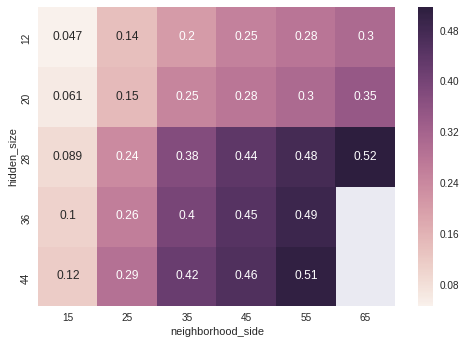

In [28]:
sns.heatmap(t, annot=True)
plt.savefig('mlp_gridsearch.png')